In [3]:

!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.9 MB/s eta 0:00:00
   ━━━━

In [2]:
pip install pandas requests scikit-learn

In [6]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.2 MB/s eta 0:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

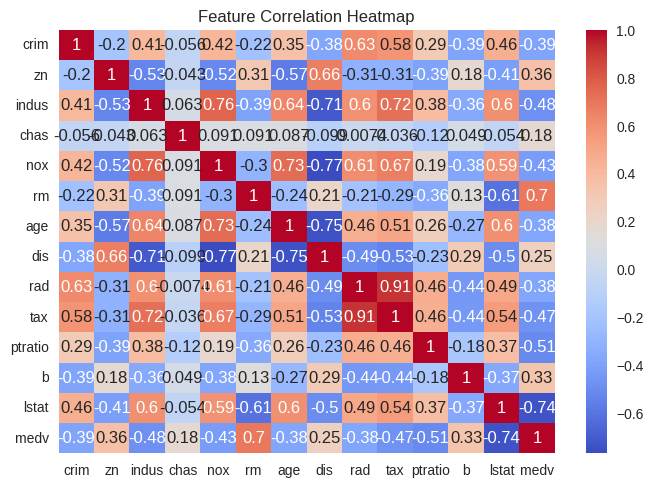

In [3]:
# 完整程式碼: 使用 PyCaret 與 Optuna 優化波士頓房價資料集模型
# 方法論: CRISP-DM

# ===========================
# 1. 業務理解（Business Understanding）
# ===========================
# 我們的目標是建立一個預測波士頓房價的模型，並透過特徵工程、自動模型選擇與超參數優化，提升模型性能。

# ===========================
# 2. 資料理解（Data Understanding）
# ===========================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入波士頓房價資料集
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# 查看數據結構
print(data.info())  # 顯示資料型態與非空數量
print(data.describe())  # 顯示基本統計量

# 畫出特徵的相關性熱圖
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
# ===========================
# 3. 資料準備（Data Preparation / Feature Engineering）
# ===========================
from pycaret.regression import *

# PyCaret 自動特徵工程設置
reg = setup(
    data=data,
    target='medv',  # 目標變數
    normalize=True,  # 標準化數據
    polynomial_features=True,  # 自動生成多項式特徵
    remove_multicollinearity=True,  # 移除多重共線性
    transformation=True,  # 應用 Box-Cox 或其他數據轉換
    session_id=123  # 固定隨機種子，便於重現
)

# ===========================
# 4. 建模（Modeling）
# ===========================
# 比較所有模型並選擇最佳模型
best_model = compare_models()
print(best_model)

# ===========================
# 5. 評估（Evaluation）
# ===========================
# 使用 PyCaret 優化模型的超參數
# 這一步將進行自動化的超參數調整
optimized_model = tune_model(best_model)

# 評估模型表現
evaluate_model(optimized_model)

# ===========================
# 6. 部署（Deployment）
# ===========================
# 儲存最終模型
save_model(optimized_model, 'final_boston_model')

# 測試加載模型
loaded_model = load_model('final_boston_model')

,Description,Value
0,Session id,123
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 35)"
5,Transformed train set shape,"(354, 35)"
6,Transformed test set shape,"(152, 35)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0408,9.7392,2.9675,0.8865,0.1333,0.1015,0.4820
xgboost,Extreme Gradient Boosting,2.1637,9.8647,3.0842,0.8768,0.1507,0.1125,0.6370
gbr,Gradient Boosting Regressor,2.2197,10.3029,3.1011,0.8736,0.1500,0.1147,0.6800
rf,Random Forest Regressor,2.1775,10.5055,3.0905,0.8726,0.1444,0.1115,1.1640
lightgbm,Light Gradient Boosting Machine,2.2448,11.0550,3.2444,0.8664,0.1471,0.1114,0.8000
ada,AdaBoost Regressor,2.7129,13.8455,3.6405,0.8249,0.1729,0.1434,0.3060
lr,Linear Regression,2.8061,15.5710,3.8196,0.8103,0.2229,0.1474,1.4600
huber,Huber Regressor,2.7778,16.1475,3.8778,0.8052,0.2043,0.1462,0.2030
ridge,Ridge Regression,2.8545,16.4960,3.9491,0.7984,0.2003,0.1488,0.5850
br,Bayesian Ridge,2.8961,17.2035,4.0299,0.7912,0.2033,0.1502,0.2850


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.4217,12.0302,3.4685,0.8654,0.1241,0.0892
1,1.7979,5.5829,2.3628,0.8794,0.1123,0.0969
2,2.3870,8.5463,2.9234,0.9147,0.1658,0.1437
3,2.8158,22.5453,4.7482,0.7777,0.2006,0.1528
4,2.5026,10.1632,3.1880,0.9138,0.1413,0.1219
5,2.3546,10.1840,3.1912,0.8105,0.1608,0.1262
6,1.6263,4.2275,2.0561,0.9373,0.0838,0.0727
7,2.9669,31.7007,5.6303,0.7091,0.2010,0.1309
8,2.0529,7.0611,2.6573,0.8737,0.1600,0.1280


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


PyCaret best model 為Extra Trees Regressor

# 使用 Optuna 進行額外的超參數優化
ChatGPT 給的模型預設為隨機森林

In [7]:
# 使用 Optuna 進行額外的超參數優化
# ===========================
# 高級超參數優化
# ===========================
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割數據集
X = data.drop(columns=['medv'])
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 定義 Optuna 目標函數

def objective(trial):
    # 隨機森林模型的超參數搜尋空間
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=123
    )

    # 交叉驗證
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

# 創建 Optuna 優化器
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 打印最佳參數
print("最佳參數:", study.best_params)

# 使用最佳參數訓練模型
final_rf_model = RandomForestRegressor(**study.best_params, random_state=123)
final_rf_model.fit(X_train, y_train)

# 測試數據評估
predictions = final_rf_model.predict(X_test)
print("測試集均方誤差 (MSE):", mean_squared_error(y_test, predictions))
print("測試集 R2 分數:", r2_score(y_test, predictions))
print("Predicted Y_test values:", predictions[:10])  # Print the first 10 predicted values
print("Actual Y_test values:", y_test.values[:10])  # Print the first 10 actual values

[I 2024-12-14 05:09:31,362] A new study created in memory with name: no-name-427b2ee0-ffc9-4b40-a677-9e0168a2b473
[I 2024-12-14 05:09:36,261] Trial 0 finished with value: 11.788082862325727 and parameters: {'n_estimators': 137, 'max_depth': 43, 'min_samples_split': 7}. Best is trial 0 with value: 11.788082862325727.
[I 2024-12-14 05:09:42,041] Trial 1 finished with value: 11.839771060343798 and parameters: {'n_estimators': 246, 'max_depth': 11, 'min_samples_split': 5}. Best is trial 0 with value: 11.788082862325727.
[I 2024-12-14 05:09:45,011] Trial 2 finished with value: 11.849967670757062 and parameters: {'n_estimators': 196, 'max_depth': 41, 'min_samples_split': 5}. Best is trial 0 with value: 11.788082862325727.
[I 2024-12-14 05:09:45,929] Trial 3 finished with value: 11.721285389444928 and parameters: {'n_estimators': 55, 'max_depth': 39, 'min_samples_split': 3}. Best is trial 3 with value: 11.721285389444928.
[I 2024-12-14 05:09:49,342] Trial 4 finished with value: 11.78119590758

最佳參數: {'n_estimators': 97, 'max_depth': 36, 'min_samples_split': 3}
測試集均方誤差 (MSE): 18.868907248586925
測試集 R2 分數: 0.7719376932086719
Predicted Y_test values: [33.71268041 27.27554737 47.96122361 20.90839961 30.57771478 43.13135739
 23.31228522  9.03754296 18.97489691 31.51032646]
Actual Y_test values: [15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]


使用PyCaret best model : Extra Trees Regressor

In [9]:
# 使用 Optuna 進行額外的超參數優化
# ===========================
# 高級超參數優化
# ===========================
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 分割數據集
X = data.drop(columns=['medv'])
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 定義 Optuna 目標函數

def objective(trial):
    # Extra Trees 模型的超參數搜尋空間
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # model = ExtraTreesRegressor(
    #     n_estimators=n_estimators,
    #     max_depth=max_depth,
    #     min_samples_split=min_samples_split,
    #     min_samples_leaf=min_samples_leaf,
    #     random_state=123
    # )
    model = loaded_model

    # 交叉驗證
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

# 創建 Optuna 優化器
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 打印最佳參數
print("最佳參數:", study.best_params)

# 使用最佳參數訓練模型
final_et_model = ExtraTreesRegressor(**study.best_params, random_state=123)
final_et_model.fit(X_train, y_train)

# 測試數據評估
predictions = final_et_model.predict(X_test)
print("測試集均方誤差 (MSE):", mean_squared_error(y_test, predictions))
print("測試集 R2 分數:", r2_score(y_test, predictions))
print("Predicted Y_test values:", predictions[:10])  # Print the first 10 predicted values
print("Actual Y_test values:", y_test.values[:10])  # Print the first 10 actual values

[I 2024-12-14 05:29:47,012] A new study created in memory with name: no-name-8e79e3c8-99a2-4522-83ad-ae3f3d60bcd7
[I 2024-12-14 05:29:51,559] Trial 0 finished with value: 9.0012459382716 and parameters: {'n_estimators': 172, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 9.0012459382716.
[I 2024-12-14 05:29:53,288] Trial 1 finished with value: 9.0012459382716 and parameters: {'n_estimators': 78, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 9.0012459382716.
[I 2024-12-14 05:29:54,998] Trial 2 finished with value: 9.0012459382716 and parameters: {'n_estimators': 256, 'max_depth': 33, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 0 with value: 9.0012459382716.
[I 2024-12-14 05:29:56,679] Trial 3 finished with value: 9.001245938271602 and parameters: {'n_estimators': 165, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 9.0012459382716.


最佳參數: {'n_estimators': 116, 'max_depth': 40, 'min_samples_split': 9, 'min_samples_leaf': 7}
測試集均方誤差 (MSE): 18.520992807347675
測試集 R2 分數: 0.7761428211999064
Predicted Y_test values: [23.15759456 26.8405989  45.64414666 18.98756321 30.8377128  36.66025929
 25.96556284 10.17908975 19.05784754 31.15182241]
Actual Y_test values: [15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
